# Prosper Loan Exploration
## by Vincent Hamel

## Preliminary Wrangling

> This document contains 113,937 loans from Prosper with different variables 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
loan = pd.read_csv('prosperLoanData.csv')

In [3]:
# Keep the variables of interest
filtered = ['Term', 'LoanStatus', 'BorrowerAPR', 'ProsperRating (Alpha)','ProsperScore', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'IncomeVerifiable', 'LoanOriginalAmount']
loan_clean = loan[filtered]

In [4]:
# High-level overview of data shape and composition
print(loan_clean.shape)
print(loan_clean.dtypes)
print(loan_clean.head(10))

(113937, 13)
Term                          int64
LoanStatus                   object
BorrowerAPR                 float64
ProsperRating (Alpha)        object
ProsperScore                float64
EmploymentStatusDuration    float64
IsBorrowerHomeowner            bool
CreditScoreRangeLower       float64
CreditScoreRangeUpper       float64
DebtToIncomeRatio           float64
StatedMonthlyIncome         float64
IncomeVerifiable               bool
LoanOriginalAmount            int64
dtype: object
   Term LoanStatus  BorrowerAPR ProsperRating (Alpha)  ProsperScore  \
0    36  Completed      0.16516                   NaN           NaN   
1    36    Current      0.12016                     A           7.0   
2    36  Completed      0.28269                   NaN           NaN   
3    36    Current      0.12528                     A           9.0   
4    36    Current      0.24614                     D           4.0   
5    60    Current      0.15425                     B          10.0   
6    36 

In [5]:
# Check for null data
loan_clean.isnull().sum()

Term                            0
LoanStatus                      0
BorrowerAPR                    25
ProsperRating (Alpha)       29084
ProsperScore                29084
EmploymentStatusDuration     7625
IsBorrowerHomeowner             0
CreditScoreRangeLower         591
CreditScoreRangeUpper         591
DebtToIncomeRatio            8554
StatedMonthlyIncome             0
IncomeVerifiable                0
LoanOriginalAmount              0
dtype: int64

In [6]:
# Remove null data
loan_clean = loan_clean.dropna(how='any')
loan_clean.shape[0]

77543

In [7]:
# Rename ProsperRating (Alpha) to ProsperRating
loan_clean = loan_clean.rename(columns={'ProsperRating (Alpha)':'ProsperRating'})

In [8]:
loan_clean.describe()

,Term,BorrowerAPR,ProsperScore,EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount
count,77543.000000,77543.000000,77543.000000,77543.000000,77543.000000,77543.000000,77543.000000,77543.000000,77543.000000
mean,42.724630,0.223727,6.062030,104.240757,699.002618,718.002618,0.258739,5963.474057,9269.504688
std,11.712344,0.079159,2.362402,96.790960,47.161527,47.161527,0.318347,5082.341185,6398.196398
min,12.000000,0.045830,1.000000,0.000000,600.000000,619.000000,0.000000,0.250000,1000.000000
25%,36.000000,0.161750,4.000000,31.000000,660.000000,679.000000,0.150000,3533.333333,4000.000000
50%,36.000000,0.215660,6.000000,75.000000,700.000000,719.000000,0.220000,5000.000000,8000.000000
75%,60.000000,0.287800,8.000000,149.000000,720.000000,739.000000,0.320000,7166.666667,14500.000000
max,60.000000,0.423950,11.000000,755.000000,880.000000,899.000000,10.010000,483333.333333,35000.000000


In [9]:
# Convert ProsperRating into ordered categorical types
ordinal_var_dict = ['AA','A','B','C','D','E','HR']
loan_clean['ProsperRating'] = loan_clean['ProsperRating'].astype('category', ordered = True,categories = ordinal_var_dict)

In [10]:
# Create a credit score column that averages the upper and lower range credit score data
loan_clean['CreditScoreAvg'] = loan_clean[['CreditScoreRangeUpper', 'CreditScoreRangeLower']].mean(axis=1)
loan_clean.drop(['CreditScoreRangeLower','CreditScoreRangeUpper'],axis=1,inplace=True)

In [11]:
# Remove non verifiable income
non_verifiable = loan_clean[loan_clean.IncomeVerifiable==False].index
loan_clean.drop(non_verifiable, inplace=True)

### What is the structure of your dataset?

> There are 77543 loans in the dataset with 13 variables listed as per below.
- Term
- LoanStatus
- BorrowerAPR
- ProsperRating
- ProsperScore
- EmploymentStatusDuration
- IsBorrowerHomeowner
- DebtToIncomeRatio
- StatedMonthlyIncome
- IncomeVerifiable
- LoanOriginalAmount
- CreditScoreAvg

> Most variables are numeric in nature, but the ProsperRating variable is ordered with the following level:

> (best) ——> (worst) <br>
A, AA, B, C, D, E, HR

### What is/are the main feature(s) of interest in your dataset?

> I would like to determine which factors affect a loan’s outcome status and what can be driving a borrower’s APR.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think the loan's outcome status can be influenced by the Prosper Rating/Score/Credit Score, the employment duration, debt to income ratio, monthly income and loan amount.

> The borrower's APR can be impacted by scoring features.

## Univariate Exploration

> Let's explore each variable.

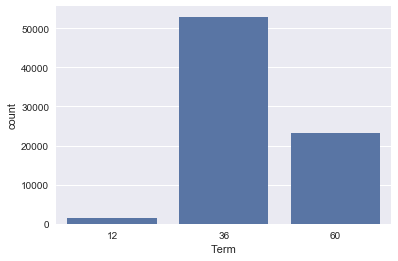

In [12]:
# Proportion of term
base = sb.color_palette()[0]
ax = sb.countplot(data=loan_clean, x='Term', color=base);

> The vast majority of loans would have a 36 or 60 months term.

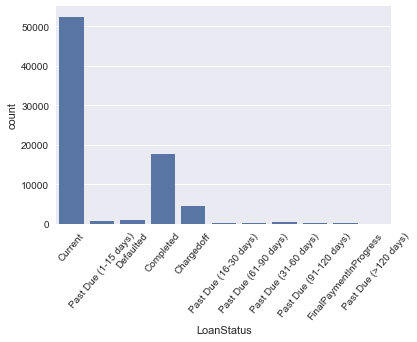

In [13]:
# Proportion of loan status
base = sb.color_palette()[0]
ax = sb.countplot(data=loan_clean, x='LoanStatus', color=base);
plt.xticks(rotation=50);

In [14]:
# Let's break this down in two parts: first the completed, defaulted and charged off loans. 
# This will also serve as a basis for our analysis.
# Then we will group together the past due loans by number of days.
loan_status_main = loan_clean[loan_clean['LoanStatus'].isin(['Completed','Defaulted','Chargedoff'])]
loan_status_past = loan_clean[loan_clean['LoanStatus'].isin(['Past Due (1-15 days)','Past Due (31-60 days)','Past Due (91-120 days)','Past Due (61-90 days)','Past Due (16-30 days)','Past Due (>120 days)'])]

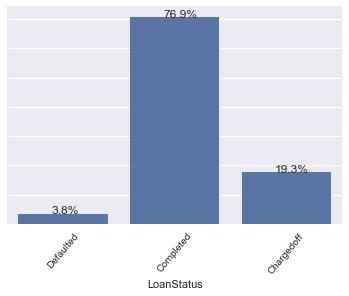

In [15]:
# Proportion of loan status
base = sb.color_palette()[0]
ax = sb.countplot(data=loan_status_main, x='LoanStatus', color=base);
plt.xticks(rotation=50);

total = len(loan_status_main['LoanStatus'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size = 12)
ax.set(yticklabels=[]);
ax.set(ylabel="");

77% of the loans aare completed and 23% were either defaulted or charged off. It will be interesting to see if we can see some patterns driving these loans to default.

In [16]:
# Convert past days variables into ordered categorical types
ordinal_var = ['Past Due (1-15 days)','Past Due (16-30 days)','Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)']
loan_status_past['LoanStatus'] = loan_status_past['LoanStatus'].astype('category', ordered = True,categories = ordinal_var)

/home/vincent/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


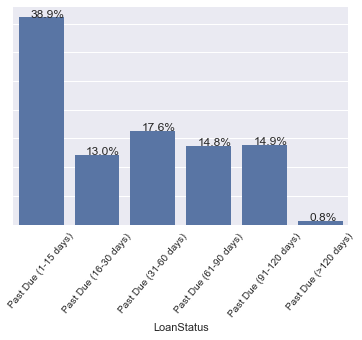

In [17]:
# Proportion of loan status
base = sb.color_palette()[0]
ax = sb.countplot(data=loan_status_past, x='LoanStatus', color=base);
plt.xticks(rotation=50);

total = len(loan_status_past['LoanStatus'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.2
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size = 12)
ax.set(yticklabels=[]);
ax.set(ylabel="");

39% of the loans are past due between 1 and 15 days which is not a source of concern. The payments past due between 16 days and 120 days would be worth investigating further if there is a pattern compared to other variables in the dataset.

(0.05, 0.4)

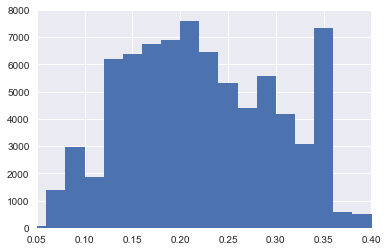

In [18]:
# Distribution of borrowers APR
bins = np.arange(0, loan_clean.BorrowerAPR.max()+0.02, 0.02)
plt.hist(data=loan_clean, x='BorrowerAPR', bins=bins);
plt.xlim(0.05, 0.40)

It is a bimodal distribution. The highest proportion of loans would have a rate close to 0.20%, others would have an APR of 0.35%. We would be intesting to determine which variables drive a higher APR. 

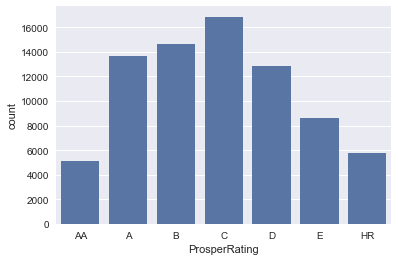

In [19]:
# Prosper Rating distribution
base = sb.color_palette()[0]
ax = sb.countplot(data=loan_clean, x='ProsperRating', color=base);

This is a unimodal and a normal distribution. The majority of loans have a 'C' rating. It would be interesting to see the distribution of the borrowers' APR and defaulted loans compared to their respective rating.

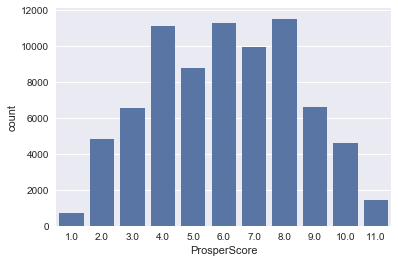

In [20]:
# Prosper Score distribution
base = sb.color_palette()[0]
ax = sb.countplot(data=loan_clean, x='ProsperScore', color=base);

This is a unimodal and a normal distribution. The majority of loans would range between 4 and 8 - 4, 6, 8 being the highest.

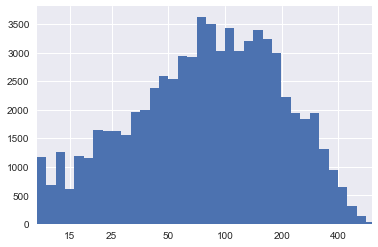

In [21]:
# Distribution of employment status duration
log_binsize = 0.05
bins = 10 ** np.arange(0, np.log10(loan_clean['EmploymentStatusDuration'].max())+log_binsize, log_binsize)
plt.hist(data=loan_clean, x='EmploymentStatusDuration', bins=bins);
plt.xscale('log')
plt.xlim(10,600);
plt.xticks([15, 25, 50, 100, 200,400], ['15','25','50', '100', '200','400']);

This is a unimodal distribution skewed to the right. The majority of borrowers would have an employment duration of less than 100 months. It would interesting to see if borrowers with a higher employment duration get a lower APR.

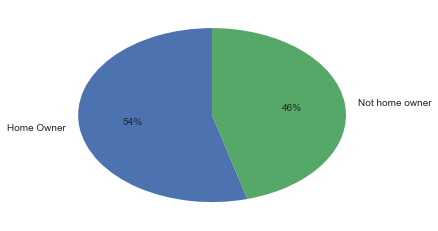

In [22]:
# Let's create a pie chart to visualise the home owners distribution
sorted_counts = loan_clean['IsBorrowerHomeowner'].value_counts()/loan_clean['IsBorrowerHomeowner'].shape[0]
sorted_counts = loan_clean['IsBorrowerHomeowner'].value_counts()
plt.pie(sorted_counts, labels=['Home Owner','Not home owner'], autopct='%1.0f%%',startangle=90);

54% of the borrowers are home owners. A home owner may get a lower rate or maybe less chance to default on a loan.

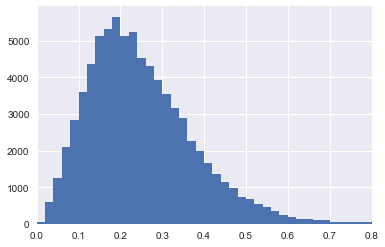

In [23]:
# Distribution of Debt to Income ratio
bins = np.arange(0, loan_clean.DebtToIncomeRatio.max()+0.02, 0.02)
ax = plt.hist(data=loan_clean, x='DebtToIncomeRatio', bins=bins)
plt.xlim(0,0.8);

It is a unimodal distribution skewed to the right. The majority of borrowers would have a debt to income ratio close 0.2. There might be a relationship with the loan status and the APR.

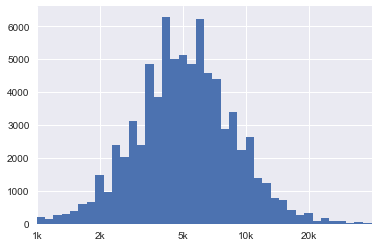

In [24]:
# Distribution of Stated Monthly Income
log_binsize = 0.04
bins = 10 ** np.arange(0, np.log10(loan_clean['StatedMonthlyIncome'].max())+log_binsize, log_binsize)
plt.hist(data=loan_clean, x='StatedMonthlyIncome', bins=bins);
plt.xscale('log');
plt.xticks([1e3, 2e3, 5e3, 1e4, 2e4], ['1k', '2k', '5k', '10k', '20k'])
plt.xlim(1000, 40000);

It is a unimodal distribution with a normal distribution. The average monthly income appears to be circa $5000 per month.

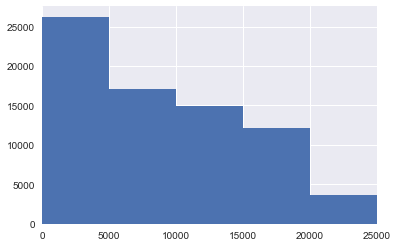

In [25]:
# Distribution of Loan amount
bins = np.arange(0, loan_clean.LoanOriginalAmount.max()+5000, 5000)
plt.hist(data=loan_clean, x='LoanOriginalAmount', bins=bins);
plt.xlim(0,25000);

By extending the bins we can see that the distribution is skewed to the right with the vast majority of loans being $25000 in average.

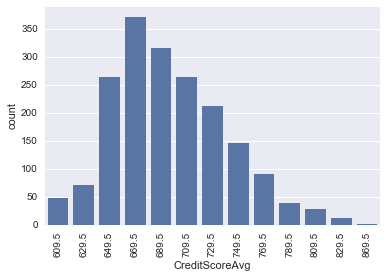

In [26]:
# Average credit score distribution
base = sb.color_palette()[0]
sb.countplot(data=loan_status_past, x='CreditScoreAvg', color=base);
plt.xticks(rotation=90);

It is a unimodal distribution and skewed to the right starting from this highest point 669.5. Again it would be interesting to see for lower credit score the proportion of defaulted loans and the APR number.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The employment status duration and the stated monthly income variables took on a large range of values so I used a log transform to get a better representation of the distribution. Both distributions appear to be normal centered around 100 months for the employment status duration and $5000 for the stated monthly income.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> First I have renamed the column ProsperRating by removing the spacing and 'Alpha' wording. I have also added a new column by averaging the lower credit score and the upper credit score columns. Both columns were removed subsequently.

> I have also stripped out the past due days from the loan status variable to keep the features of interest. The aim is to compare the completed/current loans to the defaulted/charged off loans.

## Bivariate Exploration

> Let's first look at the pairwise correlation between the quantitative variables.

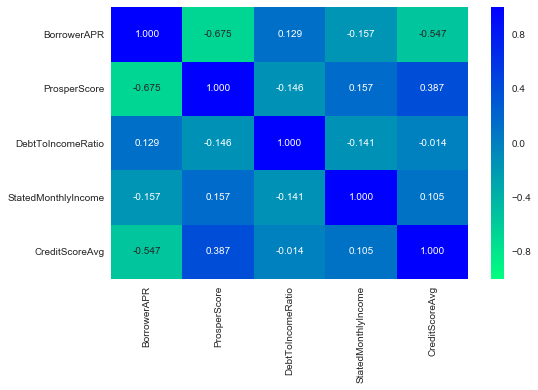

In [27]:
numeric_vars = ['BorrowerAPR', 'ProsperScore', 'DebtToIncomeRatio' , 'StatedMonthlyIncome', 'CreditScoreAvg']

# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(loan_clean[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'winter_r', center = 0)
plt.show()

> Some interesting relationship are as follows:
- The APR is negatively correlated to the ProsperScore and the credit score. The higher the score the lower the APR.
- The debt to income ratio or the stated monthly income do not appear to be correlated with other variables.

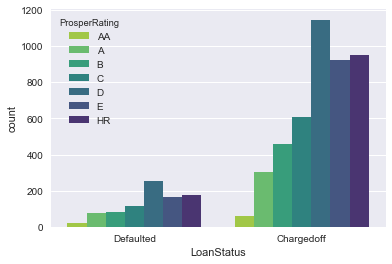

In [28]:
# Let's check what the relationship is between the Prosper Rating and the loan status.
loan_default = loan_clean[loan_clean['LoanStatus'].isin(['Defaulted','Chargedoff'])]
sb.countplot(data=loan_default, x='LoanStatus', hue='ProsperRating', palette='viridis_r');

An individual with a D, E or HR rating has a higher chance to default on a loan.

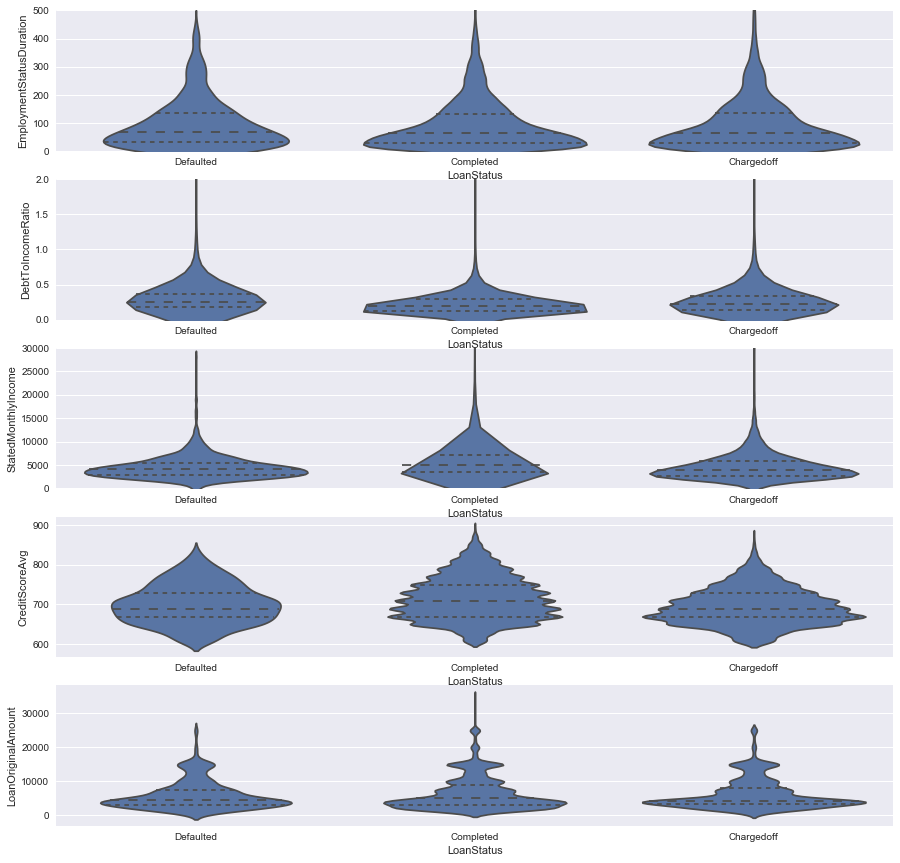

In [29]:
# Let's explore the relationship between the loan status and other quantitative variables

plt.figure(figsize = [15, 15])
base = sb.color_palette()[0]

plt.subplot(5, 1, 1)
sb.violinplot(data=loan_status_main, x='LoanStatus', y='EmploymentStatusDuration', inner='quartile', color=base)
plt.ylim(0,500)

plt.subplot(5, 1, 2)
sb.violinplot(data=loan_status_main, x='LoanStatus', y='DebtToIncomeRatio', inner='quartile', color=base)
plt.ylim(0,2)

plt.subplot(5, 1, 3)
sb.violinplot(data=loan_status_main, x='LoanStatus', y='StatedMonthlyIncome', inner='quartile', color=base)
plt.ylim(0,30000)

plt.subplot(5, 1, 4)
sb.violinplot(data=loan_status_main, x='LoanStatus', y='CreditScoreAvg', inner='quartile', color=base)

plt.subplot(5, 1, 5)
sb.violinplot(data=loan_status_main, x='LoanStatus', y='LoanOriginalAmount', inner='quartile', color=base);

> We do not see a clear relationship between the employment duration and the loan status however we can see that the defaulted loans tend to have a higher debt to income ratio.

> On the other hand the lower the credit score and monthly income the higher the probability to default on  loan.

> It is interesting to note that loans with a smaller amount have a higher chance to default. We should probably add this variable to a multivariate plot to see its relationship combined with other variables.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The APR is negatively correlated to the ProsperScore and the credit score. The higher the score the lower the APR.

> We have also observed that the higher the debt to income ratio the higher the probability to default on a loan. On the other hand a higher monthly income or higher Prosper Rating mitigates the risk of defaulting on a loan.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The Prosper score is positively correlated with the average credit score which was expected.

> An unexpected relationship however was to see that the lower the loan amount the higher the probability to default on a loan. This is probably something to assess in conjunction with other variables.

## Multivariate Exploration

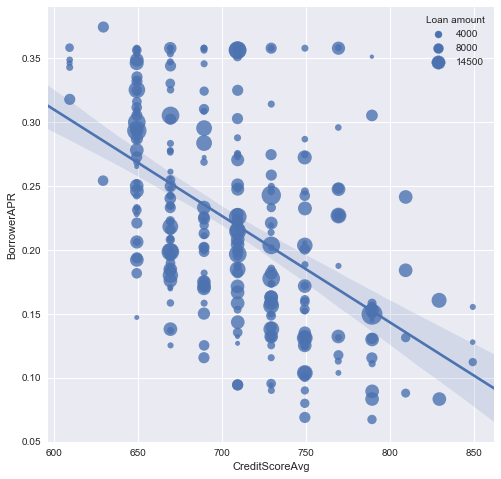

In [30]:
# Let's first compare the borrower APR with the average credit score per loan amount
plt.figure(figsize=(8,8))
samples = loan_clean.sample(n=300)
sb.regplot(data=samples, x= 'CreditScoreAvg', y='BorrowerAPR', x_jitter=0.09, fit_reg=True, scatter_kws={'s':loan_clean['LoanOriginalAmount']/80});

legend_obj=[]
sizes = [4000, 8000, 14500]
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s/80, color=base))
plt.legend(legend_obj, sizes, title="Loan amount");

The higher the average credit score the lower the APR. A high original loan amount with a low credit score tend to have a higher APR but it is not a clear relationship.

In [31]:
# Let's replace the loan amount by the Prosper Rating
samples = loan_clean.sample(n=300)
g = sb.FacetGrid(data = loan_breakdown, col='ProsperRating', col_wrap=3, size=4)
g = g.map(plt.scatter, 'CreditScoreAvg', 'BorrowerAPR')

NameError: name 'loan_breakdown' is not defined

We can see that the distribution moves from bottom right to the top left of the screen. That means that a lower Prosper rating and a lower average credit score would lead to a higher APR.

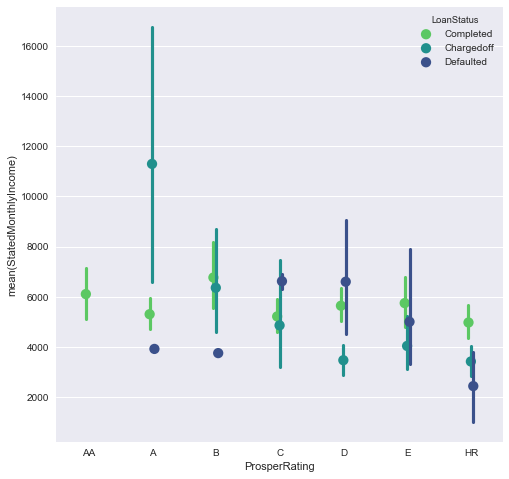

In [32]:
# Let's explore probability of defaulting on a loan based on stated monthly income and rating criteria
plt.figure(figsize=(8,8))
loan_breakdown = loan_clean[loan_clean['LoanStatus'].isin(['Chargedoff','Defaulted','Completed'])]
samples = loan_breakdown.sample(n=500)
sb.pointplot(data = samples, x= "ProsperRating", y="StatedMonthlyIncome",hue="LoanStatus", palette='viridis_r', linestyles="", dodge=True);

The chart shows that a low quality rating and a lower montly income the probability of default or being charged off is higher.

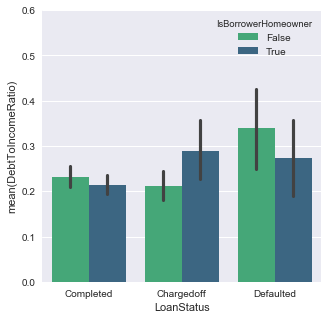

In [33]:
# Impact of debt to income ratios and home owners criteria with the completed, defaulted and charged off loans
plt.figure(figsize=(5,5))
loan_breakdown = loan_clean[loan_clean['LoanStatus'].isin(['Defaulted','Chargedoff','Completed'])]
samples = loan_breakdown.sample(n=500)
sb.barplot(data = samples, x= "LoanStatus", y="DebtToIncomeRatio",hue="IsBorrowerHomeowner", palette='viridis_r');
plt.ylim(0,0.6);

The defaulted loans and charged off loans would have a higher debt to income ratios. The moajority of defaulted loans would not own a house.

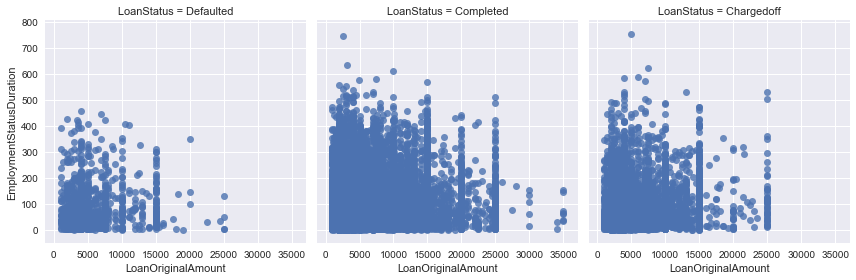

In [34]:
# Relationship loan amount and employment duration with the loan status
samples = loan_clean.sample(n=300)
g = sb.FacetGrid(data = loan_breakdown, col='LoanStatus', size=4)
g = g.map(sb.regplot, 'LoanOriginalAmount', 'EmploymentStatusDuration', x_jitter=1, fit_reg=False)

The loan amount of the defaulted and charged off loans would tend to be initially lower. The employment duration would be quite low for the defaulted loans in comparison to the completed and charged off loans.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> On the first chart I have compared the loan amount with the credit score and the APR which gave us a better picture. A lower score and a higher amount would give rise to a higher APR.

> On the second chart we have crossed referenced the Prosper rating and the average credit score with the level of APR. It was noted that a higher rating and a higher credit score would reduce the APR by three times the rate.

> On the third chart we have crossed referenced the monthly stated income and the Prosper rating to support that it is unlikely to default on a loan with a higher income and a higher rating.

> On the fourth chart a lower debt to income ratios decreases the likelihood of defaulting on a loan. The probability of defaulting on a loan as a home owner appears to be lower.

> Finally we can see that the defaulted and charged off loans would tend to have a lower loan amount. The employment status duration would also influence the probability of completing a loan successfully.

### Were there any interesting or surprising interactions between features?

> On the last chart it was interesting to compare the debt to income ratios and home owners criteria with the type of loans. It was surprising to see that the majority of charged off loans would be home owners but not for defaulted loans. The level of indebtedness may be too high for home owners unlike tenants who may be able to reduce their cost base by renting at a lower price.